## Week 8: K-Means Clustering

### Objective: Learn unsupervised learning through clustering.

### Experiment:

Apply K-Means clustering to group customers based on purchasing patterns.
- Plot the clusters in 2D space (using scaled features) and mark the centroids.
- Analyze each cluster to identify customer groups based on purchasing patterns, such as:
- High-income, high-spending customers.
- Low-income, low-spending customers

Note: We can use the Mall Customers Dataset. This dataset is available in .csv format, typically containing columns such as CustomerID, Gender, Age, Annual Income , and Spending Score (1-100).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
# Load the dataset
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Selecting relevant features for clustering
features = data[["Annual Income (k$)", "Spending Score (1-100)"]]

In [6]:
# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [7]:
# Determining the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

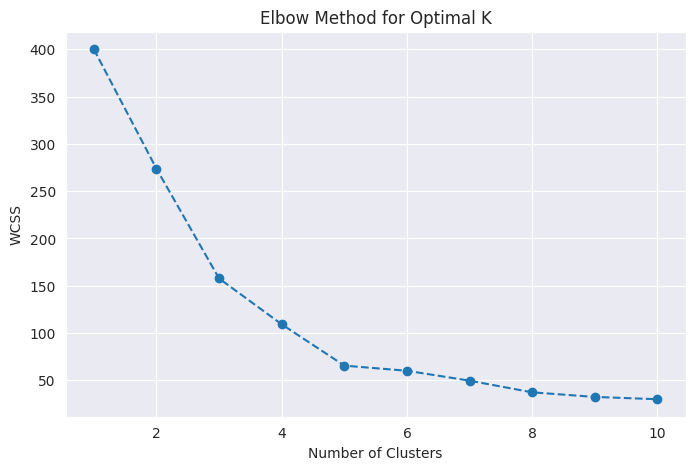

In [8]:
# Plot the Elbow Method to find the optimal K
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [9]:
# Applying K-Means with the chosen number of clusters (e.g., 5 based on the elbow method)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

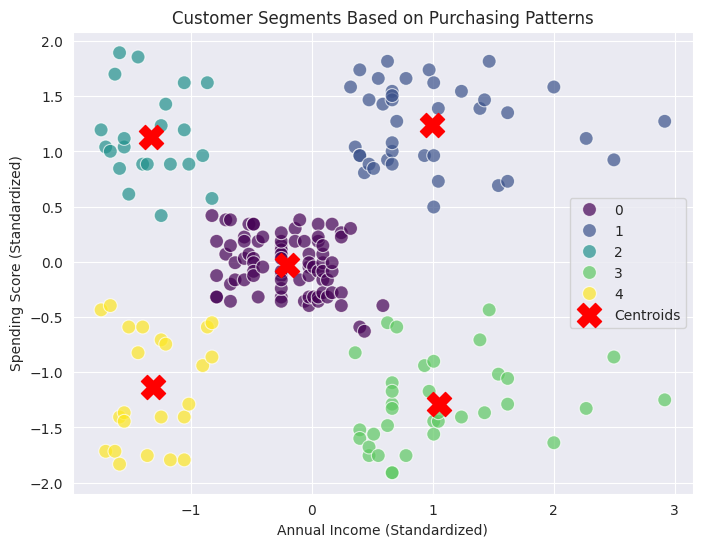

In [10]:
# Plot the clusters in 2D space
plt.figure(figsize=(8,6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=data['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel("Annual Income (Standardized)")
plt.ylabel("Spending Score (Standardized)")
plt.title("Customer Segments Based on Purchasing Patterns")
plt.legend()
plt.show()

In [11]:
# Display cluster statistics
cluster_summary = data.groupby("Cluster")[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043
